In [3]:
!pip install tweepy
!pip install configparser
!pip install pandas
!pip install transformers
!pip install datasets
import pandas as pd
import numpy as np
import requests
import os
import re
import csv
import pytz
import sklearn
from datetime import datetime, timedelta
import pandas as pd
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef


import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

import re
import csv
from transformers import pipeline
import torch.nn.functional as F
from transformers import AutoTokenizer , AutoModelForSequenceClassification
import torch


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
from tqdm import tqdm

def labeller(directory,dataset):
    tokenizer = AutoTokenizer.from_pretrained(directory)
    model = AutoModelForSequenceClassification.from_pretrained(directory)
    classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer,return_all_scores=True)
    #res = classifier("good")
    #print(res)
    df = dataset.copy()
    #df = pd.DataFrame(columns = ['text', 'real_label', 'Negative','Neutral','Positive',])
    guess = []
    pos = []
    neg = []
    neu = []

    for text in dataset['tweet']:  
          res = classifier(text)[0]
          r = {res[0]['label']:res[0]['score'], res[1]['label']:res[1]['score'], res[2]['label']:res[2]['score']}
          pos.append(r['Positive'])
          neg.append(r['Negative'])
          neu.append(r['Neutral'])
    is_pass = False
    if len(pos) == len(neg) and len(pos) == len(neu):
      print("pass equal pos neg neu length")
      if len(pos) == dataset.shape[0]:
        print("pass dataset equality")
        is_pass = True
      else:
        print("fail dataset equality")
    else:
      print("fail equal pos neg neu length")
    
    df["Positive"] = pos
    df["Negative"] = neg
    df['Neutral'] = neu
    return df,is_pass

#df = labeller(directory,valid)
#display(df)

#df.to_csv("/notebooks/fyp/final_modelV2/valid_F2_lex_head.csv")
unlabelled_ = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned/lstm_data_cleaned_4.csv"
out_name = "labelled_lstm_data_4"
out_dir = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
unlabelled = pd.read_csv(unlabelled_ ,lineterminator='\n')
display(unlabelled)
df_labelled,is_pass = labeller("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final model",unlabelled)
df_labelled.to_csv(out_dir + "/" + out_name + ".csv")

unlabelled_ = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned/lstm_data_cleaned_5.csv"
out_name = "labelled_lstm_data_5"
out_dir = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
unlabelled = pd.read_csv(unlabelled_ ,lineterminator='\n')
display(unlabelled)
df_labelled,is_pass = labeller("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final model",unlabelled)
df_labelled.to_csv(out_dir + "/" + out_name + ".csv")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached configparser-5.3.0-py3-none-any.whl (19 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Unnamed: 0,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,646474,3100174815,1564671267629834240,duganist,2022-08-30 17:47:55 UTC,2022-08-30,17:47:55,0,"FTX is a better version of Coinbase, a better ...",en,0,[],False
1,646476,1391254762499153922,1564671264446373889,zetamarkets,2022-08-30 17:47:54 UTC,2022-08-30,17:47:54,0,_btc we like Marty,en,0,[],False
2,646478,1271976542063620096,1564671251091693568,dficoastalmoons,2022-08-30 17:47:51 UTC,2022-08-30,17:47:51,0,_Archive until a certain political party gets ...,en,0,[],False
3,646480,1530613111992078339,1564671239817420800,carllyleryan,2022-08-30 17:47:48 UTC,2022-08-30,17:47:48,0,"$BTC bottom $13,200 October 9th",en,1,[],False
4,646481,1402739758015520771,1564671237019668481,animalconcerts,2022-08-30 17:47:47 UTC,2022-08-30,17:47:47,0,"@_TheFigen Can confirm, this works. How I re...",en,2,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,646963,1283502143362576384,1564668274721230848,bthomasbooks,2022-08-30 17:36:01 UTC,2022-08-30,17:36:01,0,_s_bitcoin The predicted price floor from Mark...,en,0,[],False
304,646965,1532113040501514240,1564668267473633282,patiencemlengan,2022-08-30 17:35:59 UTC,2022-08-30,17:35:59,0,Have you heard about bitcoin mining?,en,0,[],False
305,646966,14346923,1564668258330066945,raffel,2022-08-30 17:35:57 UTC,2022-08-30,17:35:57,0,It’s amazing. The grinder is the finest tool I...,en,0,[],False
306,646967,295325403,1564668226616799232,redcanoe63,2022-08-30 17:35:50 UTC,2022-08-30,17:35:50,0,_there4_i_am How's that retirement portfolio ...,en,0,[],False


/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:90: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  "`return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality", UserWarning


pass equal pos neg neu length
pass dataset equality


,Unnamed: 0,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,500000,1166354474341937152,1552528360273629184,cryptoplp,2022-07-28 05:36:20 UTC,2022-07-28,05:36:20,0,@Mike_4_Cash @MiltonFriedom5 No sera 1887?,es,0,[],False
1,500001,2315789481,1552528356708589568,benjo18_,2022-07-28 05:36:19 UTC,2022-07-28,05:36:19,0,Le btc est ma salope,fr,0,[],False
2,500002,859583246090227712,1552528313985380352,lolsonrealtor,2022-07-28 05:36:09 UTC,2022-07-28,05:36:09,0,"@AdamSchefter Ouch, you typed it that way to p...",en,0,[],False
3,500003,1396369890542604291,1552528306066661376,last_bitcoin,2022-07-28 05:36:07 UTC,2022-07-28,05:36:07,0,@sophielouisecc Immovable infrastructure can b...,en,0,[],False
4,500004,1541212645977722880,1552528289901821952,bitcoinooze,2022-07-28 05:36:03 UTC,2022-07-28,05:36:03,0,@WallStreetSilv Love the dutch,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,599995,244461282,1551664351550906368,greatwoif,2022-07-25 20:23:04 UTC,2022-07-25,20:23:04,0,@coinexcom Please consider lowering the Dash w...,en,0,[],False
99996,599996,1497646890028048394,1551664346752843776,btc_hprbtczn,2022-07-25 20:23:03 UTC,2022-07-25,20:23:03,0,"@JohnLegere The beggar , scammers, losers teac...",en,0,[],False
99997,599997,1370679208716816385,1551664346480386048,herbertchandl18,2022-07-25 20:23:03 UTC,2022-07-25,20:23:03,0,@Oiggroup @SatorSAO @Bitcoin Many projects app...,en,0,[],False
99998,599998,1457728456993779716,1551664342831169536,bitcoiod00mmano,2022-07-25 20:23:02 UTC,2022-07-25,20:23:02,0,@_miguelmedeiros @TiradentesBTC @38bitcoinheir...,pt,0,[],False


/usr/local/lib/python3.7/dist-packages/transformers/pipelines/text_classification.py:90: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  "`return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality", UserWarning


KeyboardInterrupt: ignored

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
from tqdm import tqdm

def labeller(directory,dataset):
    tokenizer = AutoTokenizer.from_pretrained(directory)
    model = AutoModelForSequenceClassification.from_pretrained(directory)
    classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer,return_all_scores=True)
    #res = classifier("good")
    #print(res)
    df = dataset.copy()
    #df = pd.DataFrame(columns = ['text', 'real_label', 'Negative','Neutral','Positive',])
    guess = []
    pos = []
    neg = []
    neu = []

    for text in dataset['tweet']:  
          res = classifier(text)[0]
          r = {res[0]['label']:res[0]['score'], res[1]['label']:res[1]['score'], res[2]['label']:res[2]['score']}
          pos.append(r['Positive'])
          neg.append(r['Negative'])
          neu.append(r['Neutral'])
    is_pass = False
    if len(pos) == len(neg) and len(pos) == len(neu):
      print("pass equal pos neg neu length")
      if len(pos) == dataset.shape[0]:
        print("pass dataset equality")
        is_pass = True
      else:
        print("fail dataset equality")
    else:
      print("fail equal pos neg neu length")
    
    df["Positive"] = pos
    df["Negative"] = neg
    df['Neutral'] = neu
    return df,is_pass

#df = labeller(directory,valid)
#display(df)

#df.to_csv("/notebooks/fyp/final_modelV2/valid_F2_lex_head.csv")
unlabelled_ = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned/lstm_data_cleaned_2.csv"
out_name = "labelled_lstm_data_2"
out_dir = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
unlabelled = pd.read_csv(unlabelled_ ,lineterminator='\n')
display(unlabelled)
df_labelled,is_pass = labeller("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final model",unlabelled)
df_labelled.to_csv(out_dir + "/" + out_name + ".csv")


In [ ]:
def filter(data):
  df = data
  df = df[df["tweet"].str.contains(" crypto | cryptocurrency | bitcoin | btc ")==True]
  return df
def clean(text):
  text = re.sub(r'@[A-Za-z0-9:]+', '',text) #removes @ mentions
  text = re.sub(r'#','',text) #remove #
  text = re.sub(r'RT[\s]+','',text) # remove RT
  text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text) #removes links
  text = re.sub(r'\s*$','',text) #remove leading and trailing whitespace
  text = re.sub(r'^\s*','',text) #remove leading and leading whitespace
  text = re.sub(r'.+:', '',text) #remove username:
  return text

def clean_data(data):
  data = data[data.language == 'en']
  data.replace("", np.nan, inplace=True) # replace empty string to nan 
  data.dropna(subset = ["tweet"], inplace=True) #remove all rows with nan tweet
  data['tweet'] = data['tweet'].apply(clean)
  data.replace("", np.nan, inplace=True) # replace empty string to nan 
  data.dropna(subset = ["tweet"], inplace=True) #remove all rows with nan twee
  data = data.drop_duplicates(subset = 'tweet', keep = False ) # remove duplicates and keep none 
  return data

#t = df_gold.iloc[0]['tweet']


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint/twint1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint2/twint1.csv")
df3 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint3/twint1.csv")
df = pd.concat([df1,df2,df3])
print(df.shape[0])
df = df.drop_duplicates( keep='first', ignore_index=True)
print(df.shape[0])
display(df)

675800
646970


,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,1426115688339410945,1544510702961844226,bigwindollar_,2022-07-06 02:37:01 UTC,2022-07-06,02:37:01,0,@yopicoin #yopicoin x1000 🚀 #yopinetwork #bitcoin,und,0,"['yopicoin', 'yopinetwork', 'bitcoin']",False
1,260006070,1544510681751470081,dondon_wontons,2022-07-06 02:36:56 UTC,2022-07-06,02:36:56,0,You really can’t be nice to folks,en,0,[],False
2,1149166543781212160,1544510677141884928,alejito_eth,2022-07-06 02:36:55 UTC,2022-07-06,02:36:55,0,@LH_btc @traderZ0 The queen shorting too 🥂,en,0,[],False
3,812751240,1544510665158967296,cryptopatel,2022-07-06 02:36:52 UTC,2022-07-06,02:36:52,0,@BitcoinMagazine Always Bullish on #Bitcoin ❤,en,0,['bitcoin'],False
4,1519473869802786816,1544510661488586753,sasboomstick,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,@Eric_BIGfund Once trash tech algos stop leadi...,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...
646965,1532113040501514240,1564668267473633282,patiencemlengan,2022-08-30 17:35:59 UTC,2022-08-30,17:35:59,0,@George78772946 @tWeatherSA Have you heard abo...,en,0,[],False
646966,14346923,1564668258330066945,raffel,2022-08-30 17:35:57 UTC,2022-08-30,17:35:57,0,@MarekZee It’s amazing. The grinder is the fin...,en,0,[],False
646967,295325403,1564668226616799232,redcanoe63,2022-08-30 17:35:50 UTC,2022-08-30,17:35:50,0,@btc_there4_i_am @SenTedCruz How's that retire...,en,0,[],False
646968,231796050,1564668219918532608,highertable,2022-08-30 17:35:48 UTC,2022-08-30,17:35:48,0,@markhendy @fieryseahorse @EssexPR Do you envi...,en,0,[],False


In [ ]:
df_cleaned = clean_data(df)
display(df_cleaned)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
1,260006070,1544510681751470081,dondon_wontons,2022-07-06 02:36:56 UTC,2022-07-06,02:36:56,0,You really can’t be nice to folks,en,0,[],False
2,1149166543781212160,1544510677141884928,alejito_eth,2022-07-06 02:36:55 UTC,2022-07-06,02:36:55,0,_btc The queen shorting too 🥂,en,0,[],False
3,812751240,1544510665158967296,cryptopatel,2022-07-06 02:36:52 UTC,2022-07-06,02:36:52,0,Always Bullish on Bitcoin ❤,en,0,['bitcoin'],False
4,1519473869802786816,1544510661488586753,sasboomstick,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,_BIGfund Once trash tech algos stop leading bi...,en,0,[],False
5,54897838,1544510658988875777,botelhofabio,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,Change this algorithm elon,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...
646963,1283502143362576384,1564668274721230848,bthomasbooks,2022-08-30 17:36:01 UTC,2022-08-30,17:36:01,0,_s_bitcoin The predicted price floor from Mark...,en,0,[],False
646965,1532113040501514240,1564668267473633282,patiencemlengan,2022-08-30 17:35:59 UTC,2022-08-30,17:35:59,0,Have you heard about bitcoin mining?,en,0,[],False
646966,14346923,1564668258330066945,raffel,2022-08-30 17:35:57 UTC,2022-08-30,17:35:57,0,It’s amazing. The grinder is the finest tool I...,en,0,[],False
646967,295325403,1564668226616799232,redcanoe63,2022-08-30 17:35:50 UTC,2022-08-30,17:35:50,0,_there4_i_am How's that retirement portfolio ...,en,0,[],False


In [ ]:
import math
def splitter(df_,out_dir,size):
  df = df_.copy()
  splits = math.ceil(df.shape[0] / size)
  for split in range(splits):
    start = 0 + (split)*size
    end = (split+1) * size
    if end > df.shape[0]:
      end = df.shape[0]
    df_o = df[start:end]
    df_o.to_csv(out_dir +"/lstm_data_cleaned_" + str(split) +".csv")

print(df.shape[0])
splitter(df_cleaned,"/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned",100000)

646970


In [ ]:
unlabelled_ = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned/lstm_data_cleaned_1.csv"
out_name = "labelled_lstm_data_1"
out_dir = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
unlabelled = pd.read_csv(unlabelled_ ,lineterminator='\n')
display(unlabelled)
df_labelled,is_pass = labeller("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final model",unlabelled)
df_labelled.to_csv(out_dir + "/" + out_name + ".csv")


,Unnamed: 0,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,164515,1350095065117388803,1543518745292902400,barbara45495645,2022-07-03 08:55:20 UTC,2022-07-03,08:55:20,0,Meerkat💰Go to the moon with sol💰 BTC🤑 💰 💖SoulT...,en,0,[],False
1,164516,955400088884600832,1543518740284952577,mianmujeeburre1,2022-07-03 08:55:19 UTC,2022-07-03,08:55:19,0,_OFFICIAL If ustc reach to 1$dn may be but the...,en,0,[],False
2,164517,1427181660907261952,1543518723742769154,geffrey1347,2022-07-03 08:55:15 UTC,2022-07-03,08:55:15,0,___ Wow that's awesome value although it is a ...,en,0,[],False
3,164519,106791329,1543518693455544321,vendavendor,2022-07-03 08:55:08 UTC,2022-07-03,08:55:08,0,They need to challenge him to a more serious c...,en,0,[],False
4,164520,925802822117089280,1543518690955632640,coinstar2,2022-07-03 08:55:07 UTC,2022-07-03,08:55:07,0,What's Bitcoin good for?,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,325396,2855542157,1542320583853105153,biohazard3737,2022-06-30 01:34:16 UTC,2022-06-30,01:34:16,0,_its_lily What‘s the point of a Bitcoin ETF? Y...,en,0,[],False
99996,325399,95257097,1542320566849388544,mikealfred,2022-06-30 01:34:12 UTC,2022-06-30,01:34:12,0,_s_bitcoin This is so deep that most plebs won...,en,0,[],False
99997,325400,789246389826023424,1542320564362219520,gilpdo,2022-06-30 01:34:12 UTC,2022-06-30,01:34:12,0,Three ISPs controll basically all the traffic ...,en,0,[],False
99998,325402,1390426277551742976,1542320555155546113,btcstratum,2022-06-30 01:34:09 UTC,2022-06-30,01:34:09,0,__carter _BTC I was responding to but wanted...,en,0,[],False


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(is_pass)
display(df_labelled)

In [ ]:
def find_date_gaps(df):
  
  deltas = df['date'].diff()

  # Filter diffs (here days > 1, but could be seconds, hours, etc)
  gaps = deltas[deltas > timedelta(days=1)]

  # Print results
  print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')
  for i, g in gaps.iteritems():
      gap_start = df['date'][i - 1]
      print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
            f'Duration: {str(g.to_pytimedelta())}')
 

In [ ]:
df_o = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/data with sentient scores/Bitcoin_tweets_cleaned_no_duplicates_with_scores.csv')
display(df_o)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,date,tweet,is_retweet,afinn_score,vader_score,textblob_score
0,0,0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after bi...,False,0.017241,0.2960,0.0
1,1,1,2021-02-10 23:58:48,"😎 Today, that's this Thursday, we will do a ""🎬...",False,0.017241,0.8225,0.0
2,2,2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",False,0.051724,0.5719,0.0
3,3,4,2021-02-10 23:54:06,BTC in too big to fail…,False,-0.017241,0.0000,0.0
4,4,6,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\nBitcoin Crypto BTC,False,-0.034483,0.0000,0.0
...,...,...,...,...,...,...,...,...
2733685,2733687,3543846,2022-05-30 00:00:04,📄Daily BTC Liquidation Summary📄\n\n Liquidatio...,False,0.000000,0.0000,0.0
2733686,2733688,3543847,2022-05-30 00:00:04,⭕️Daily BTC Spot Summary⭕️ \n Total Trades\n🟢B...,False,0.000000,0.0000,0.0
2733687,2733689,3543848,2022-05-30 00:00:03,1790.98\n\n03 UTC\n03 JST\n &gt; 29430.0 la...,False,0.000000,0.0000,0.0
2733688,2733690,3543850,2022-05-30 00:00:02,ASTRO BOT ALE$BTCUSDT\n\n2h\n\n LONG(Buy) from...,False,NaN,NaN,NaN


In [ ]:
df = df_o.copy()
#display(pytz.all_timezones)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
#display(df)
#convert from utc to est and bitcoin data is in est
df['date'] = df['date'].dt.tz_localize("GMT").dt.tz_convert('est').dt.tz_localize(None)
#display(df)
df = df.groupby([df['date'].dt.date])['vader_score'].mean()
#print(type(df['date'][0]))
#display(df)
df =df.to_frame()
display(df)

,vader_score
date,
2021-02-05,0.106381
2021-02-06,0.110323
2021-02-07,0.135234
2021-02-08,0.130169
2021-02-09,0.131850
...,...
2022-05-31,0.193048
2022-06-01,0.160407
2022-06-02,0.170206


In [ ]:
bit_price = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/Bitstamp_BTCUSD_d.csv')
display(bit_price)
bit_price['date'] = pd.to_datetime(bit_price['date'], format='%d/%m/%Y %H:%M')
bit_price = bit_price[['date', 'close']]
bit_price.set_index('date',inplace = True)
display(bit_price)


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1654992000,12/06/2022 00:00,BTC/USD,28397.38,28495.89,28356.02,28459.30,9.044315e+00,2.573949e+05
1,1654905600,11/06/2022 00:00,BTC/USD,29065.66,29403.62,28085.75,28390.94,1.587195e+03,4.506197e+07
2,1654819200,10/06/2022 00:00,BTC/USD,30068.53,30333.81,28832.83,29065.66,2.545341e+03,7.398202e+07
3,1654732800,09/06/2022 00:00,BTC/USD,30190.31,30672.56,29920.56,30089.03,9.539293e+02,2.870281e+07
4,1654646400,08/06/2022 00:00,BTC/USD,31108.30,31310.53,29831.85,30185.58,1.909672e+03,5.764457e+07
...,...,...,...,...,...,...,...,...,...
2749,1417478400,02/12/2014 00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2750,1417392000,01/12/2014 00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2751,1417305600,30/11/2014 00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2752,1417219200,29/11/2014 00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


,close
date,
2022-06-12,28459.30
2022-06-11,28390.94
2022-06-10,29065.66
2022-06-09,30089.03
2022-06-08,30185.58
...,...
2014-12-02,379.25
2014-12-01,378.39
2014-11-30,373.34


In [ ]:
df_merged = df.merge(bit_price, left_index=True, right_index=True)
display(df_merged)

,vader_score,close
date,,
2022-06-04,0.189052,29853.51
2022-06-03,0.181509,29669.39
2022-06-02,0.170206,30437.18
2022-06-01,0.160407,29787.40
2022-05-31,0.193048,31762.76
...,...,...
2021-02-09,0.131850,46505.20
2021-02-08,0.130169,46416.45
2021-02-07,0.135234,38858.39


In [ ]:
df = df_merged.copy()
df = df.sort_index()
df_ = df.reset_index()
#display(df)

# create new datetime index based on specified range
daterng_all = pd.date_range(start=df_["date"].iloc[0], end=df_["date"].iloc[-1])

# create rows with missing intervals and fill missing data
df_test = df.reindex(daterng_all, fill_value=np.nan)
#display(df_test)
df = df_test.reset_index()
df = df.rename(columns={'index': 'date'})
#df = df.rename_axis('index1').reset_index()

display(df)
find_date_gaps(df)

,date,vader_score,close
0,2021-02-05,0.106381,38320.00
1,2021-02-06,0.110323,39282.10
2,2021-02-07,0.135234,38858.39
3,2021-02-08,0.130169,46416.45
4,2021-02-09,0.131850,46505.20
...,...,...,...
480,2022-05-31,0.193048,31762.76
481,2022-06-01,0.160407,29787.40
482,2022-06-02,0.170206,30437.18
483,2022-06-03,0.181509,29669.39


0 gaps with average gap duration: NaT


In [ ]:
df_ = df.copy()
for i in df_['date']:
  print(type(i))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

Streaming output truncated to the last 5000 lines.
Epoch 6501/9000
3/3 [==============================] - 0s 15ms/step - loss: 0.0456 - val_loss: 0.1475
Epoch 6502/9000
3/3 [==============================] - 0s 16ms/step - loss: 0.0281 - val_loss: 0.1513
Epoch 6503/9000
3/3 [==============================] - 0s 22ms/step - loss: 0.0251 - val_loss: 0.1517
Epoch 6504/9000
3/3 [==============================] - 0s 16ms/step - loss: 0.0249 - val_loss: 0.1443
Epoch 6505/9000
3/3 [==============================] - 0s 16ms/step - loss: 0.0279 - val_loss: 0.1442
Epoch 6506/9000
3/3 [==============================] - 0s 17ms/step - loss: 0.0255 - val_loss: 0.1525
Epoch 6507/9000
3/3 [==============================] - 0s 16ms/step - loss: 0.0205 - val_loss: 0.1594
Epoch 6508/9000
3/3 [==============================] - 0s 15ms/step - loss: 0.0217 - val_loss: 0.1587
Epoch 6509/9000
3/3 [==============================] - 0s 16ms/step - loss: 0.0224 - val_loss: 0.1543
Epoch 6510/9000
3/3 [==========

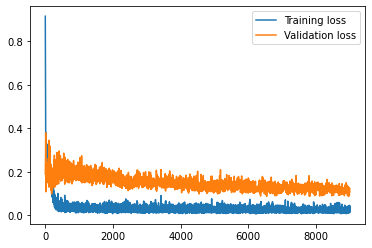

In [ ]:
# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu
Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""
#base code taken from above but modified to fit my needs

import tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

#Read the csv file
#df = pd.read_csv('data/GE.csv')
print(df.head()) #7 columns, including the Date. 

#Separate dates for future plotting
train_dates = pd.to_datetime(df['date'])
print(train_dates.tail(15)) #Check last few dates. 

#Variables for training
cols = list(df)[1:3]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']


#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    x = df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]]
    y = df_for_training_scaled[i + n_future - 1:i + n_future, 0]
    if not np.isnan(x).any() and not np.isnan(y).any():
      #display(x)
      #display(y)
      trainX.append(x)
      trainY.append(y)

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=10000, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [ ]:

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'close':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])


original = df[['date', 'close']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-5-1']

sns.lineplot(original['date'], original['close'])
sns.lineplot(df_forecast['date'], df_forecast['close'])

In [ ]:

#check for gaps in dates

df = df_merged.copy()
display(df)
df = df.reset_index(level=0)
df = df.sort_values(by = 'date')
#df = df.drop(labels=[2,15,20], axis=0)
display(df)

# Take the diff of the first column (drop 1st row since it's undefined)
     
find_date_gaps(df)

In [ ]:
df_o_2 = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/Bitcoin_tweets.csv')
df_o_3 = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/Bitcoin_tweets_cleaned.csv')

In [ ]:
df = df_o_3.copy()
df.drop_duplicates(subset = 'date' , inplace = True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df.drop_duplicates(subset = 'date' , inplace = True)
display(df)

In [ ]:
display(df)
#df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df = df.sort_values(by = 'date')
display(df)
find_date_gaps(df)